# COVID-19 Prediction

## Data


In [2]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
%load_ext autoreload

In [3]:
import codebase
from codebase.data_generation import *
from codebase.sparse_regression import *
from codebase.utils import *


In [4]:
%autoreload
dataset = CountryDataset()

In [148]:

country_data = dataset.cumulative('Canada', rescaling=10000)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, 'relu'),
    tf.keras.layers.Dense(50, 'relu'),
    tf.keras.layers.Dense(50, 'relu'),
    tf.keras.layers.Dense(50, 'relu'),
    tf.keras.layers.Dense(50, 'relu'),
    tf.keras.layers.Dense(50, 'relu'),
    tf.keras.layers.Dense(20, 'relu'),
    tf.keras.layers.Dense(1),
])

model.compile('adam', 'MSE')

targets, features = make_targets(country_data.reshape(-1, 1))

model.fit(features, targets, epochs=100, batch_size=16)

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 5.8951
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 2.4648
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2515
Epoch 4/100
7/7 [==============================] - 0s 1ms/step - loss: 0.3179
Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 0.1057
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 12/100
7/7 [==============================] - 0s 2ms/step - loss: 9.1283e-04
Epoch 13/100
7/7 [==============================] - 0s 2m

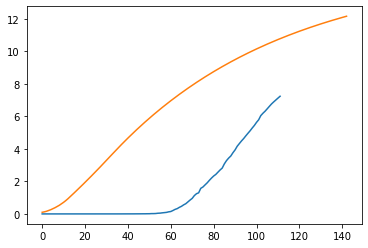

In [149]:
trajectory = [0.1]
for k in range(len(country_data)+30):
    trajectory.append(model.predict(np.array([trajectory[k]]))[0])

plt.plot(country_data)
plt.plot(trajectory)

In [7]:
data = dataset.ox_augmented()
data['susceptible'] = 1.4e9*data['SP.POP.TOTL']

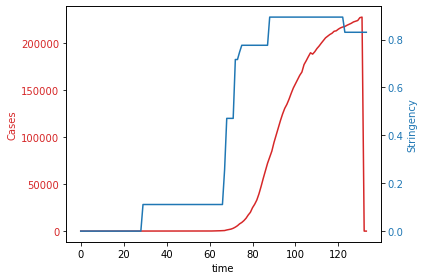

In [10]:
country_data = data[data['CountryName'] == 'Spain']

t = range(len(country_data))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('Cases', color=color)
ax1.plot(t, country_data['ConfirmedCases'], label='cases', color=color)
# ax1.plot(t, values[:, 1], label='deaths', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Stringency', color=color)
ax2.plot(t, country_data['StringencyIndexForDisplay'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


In [8]:
train_data, test_data, countries = dataset.ox_train_test(rescaling=(rescaling:=1000))

In [9]:
m2, m1 = make_targets_df(train_data)
different = m1['ConfirmedCases'].reset_index(drop=True) != m2['ConfirmedCases'].reset_index(drop=True)
m2, m1 = m2.loc[different], m1.loc[different]
print('Train samples: ', len(m1.index))

test_m2, test_m1 = make_targets_df(test_data)
different = test_m1['ConfirmedCases'].reset_index(drop=True) != test_m2['ConfirmedCases'].reset_index(drop=True)
test_m2, test_m1 = test_m2.loc[different], test_m1.loc[different]
print('Test samples: ', len(test_m1.index))

poly_args = {
    'variables': ['ConfirmedCases', 'SH.MED.BEDS.ZS', 'SH.MED.PHYS.ZS', 'SH.MED.NUMW.P3', 'SH.UHC.SRVS.CV.XD', 'SH.XPD.CHEX.GD.ZS', 'SH.XPD.CHEX.PC.CD', 'SH.XPD.CHEX.PP.CD', 'SH.XPD.OOPC.CH.ZS', 'SH.XPD.OOPC.PC.CD', 'SH.XPD.OOPC.PP.CD', 'SH.STA.DIAB.ZS', 'SP.DYN.LE00.FE.IN', 'SP.DYN.LE00.IN', 'SP.DYN.LE00.MA.IN', 'SP.DYN.AMRT.FE', 'SP.DYN.AMRT.MA', 'SH.DYN.NCOM.ZS', 'SH.DYN.NCOM.FE.ZS', 'SH.DYN.NCOM.MA.ZS', 'SH.DTH.COMM.ZS', 'SH.DTH.INJR.ZS', 'SH.DTH.NCOM.ZS', 'SH.H2O.BASW.ZS', 'SH.STA.BASS.ZS', 'SP.POP.80UP.FE.5Y', 'SP.POP.80UP.MA.5Y', 'SP.POP.65UP.FE.ZS', 'SP.POP.65UP.MA.ZS', 'SP.POP.65UP.TO.ZS', 'SP.POP.0014.FE.ZS', 'SP.POP.0014.MA.ZS', 'SP.POP.0014.TO.ZS', 'SP.POP.1564.FE.ZS', 'SP.POP.1564.MA.ZS', 'SP.POP.1564.TO.ZS', 'SP.POP.TOTL'],
    'predicted_variables': ['ConfirmedCases'],
    'max_degree': 3
}

Train samples:  5967
Test samples:  1249


In [19]:
m2['ConfirmedCases']

53       0.001
60       0.004
66       0.007
69       0.010
73       0.016
         ...  
14035    0.146
14036    0.153
14037    0.167
14038    0.252
14039    0.267
Name: ConfirmedCases, Length: 5967, dtype: float64

In [151]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, 'relu'),
    tf.keras.layers.Dense(100, 'relu'),
    tf.keras.layers.Dense(50, 'relu'),
    tf.keras.layers.Dense(50, 'relu'),
    tf.keras.layers.Dense(50, 'relu'),
    tf.keras.layers.Dense(50, 'relu'),
    tf.keras.layers.Dense(20, 'relu'),
    tf.keras.layers.Dense(1),
])

optimizer = tf.keras.optimizers.Adam(1e-5)

model.compile(optimizer, 'MSE')

model.fit(m1[poly_args['variables']], m2[poly_args['predicted_variables']],
          validation_data=(test_m1[poly_args['variables']], test_m2[poly_args['predicted_variables']]),
          epochs=10, batch_size=16)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1106/1106 [==============================] - 5s 5ms/step - loss: 2223257600.0000 - val_loss: 1676.2914
Epoch 2/10
1106/1106 [==============================] - 5s 5ms/step - loss: 2017840896.0000 - val_loss: 1350.3926
Epoch 3/10
1106/1106 [==============================] - 5s 5ms/step - loss: 1441471872.0000 - val_loss: 826.3572
Epoch 4/10
1106/1106 [==============================] - 5s 4ms/step - loss: 848866304.0000 - val_loss: 391.7129
Epoch 5/10
1106/1106 [==============================] -

<ipython-input-152-5126ab6524df>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_data = m1[(m1['CountryName'] == country) & (data['ConfirmedCases'] > 0.5)]


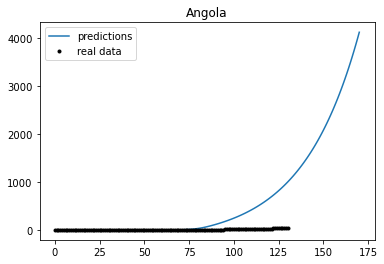

<ipython-input-152-5126ab6524df>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_data = m1[(m1['CountryName'] == country) & (data['ConfirmedCases'] > 0.5)]


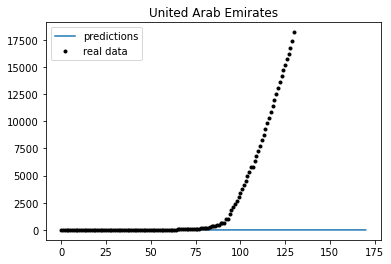

<ipython-input-152-5126ab6524df>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_data = m1[(m1['CountryName'] == country) & (data['ConfirmedCases'] > 0.5)]


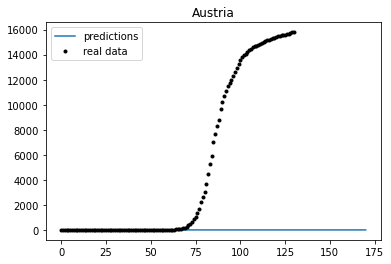

<ipython-input-152-5126ab6524df>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_data = m1[(m1['CountryName'] == country) & (data['ConfirmedCases'] > 0.5)]


KeyboardInterrupt: 

In [152]:

def integrate_nn(real_data, 
                 model,
                 extrapolation=50):
    real_data = real_data.append(real_data.iloc[[-1]*extrapolation]).reset_index(drop=True).copy()
    predicted_values = []
    
    for k in range(len(real_data.index) - 1):
        current_row = real_data[poly_args['variables']].iloc[[k]]
        predicted_values.append(model.predict(current_row.values)[0])
        real_data.loc[k+1, poly_args['predicted_variables']] = predicted_values[-1]
    return np.array(predicted_values)

for country in countries['train_countries']:
    country_data = m1[m1['CountryName'] == country]
    t = range(len(country_data.index) + (extrapolation:=40))
    high_data = m1[(m1['CountryName'] == country) & (data['ConfirmedCases'] > 0.5)]
    real_t = len(high_data.index)
    if real_t:
        guess = integrate_nn(high_data, model, extrapolation=extrapolation)
        plt.plot(t[-real_t + 1 -extrapolation:], guess[:, 0], label='predictions')
        plt.plot(t[:-extrapolation], country_data['ConfirmedCases'], 'k.', label='real data')
        plt.legend()
        plt.title(country)
        
        fig.tight_layout()
        plt.show()

In [ ]:
best_weights['test_mse'][0].numpy()

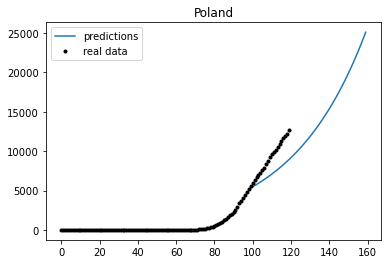

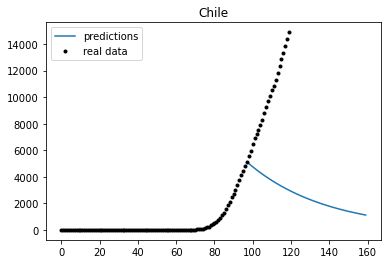

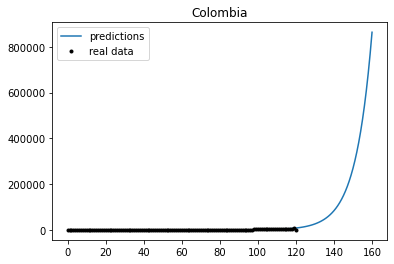

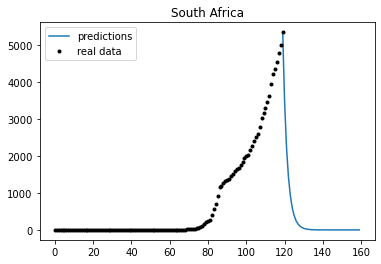

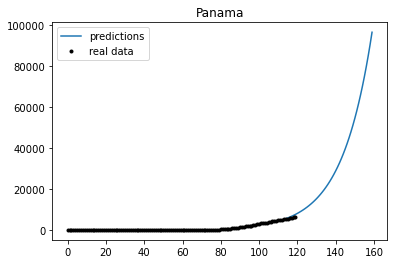

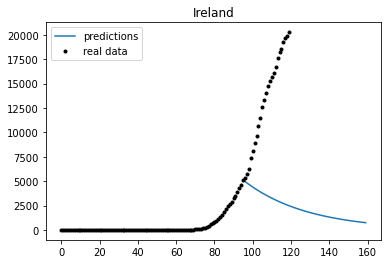

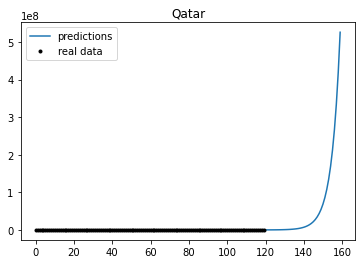

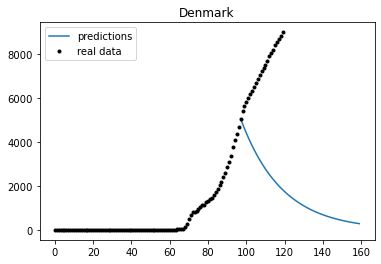

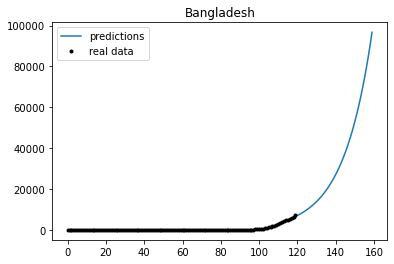

In [46]:
plotted_countries = []
for country in test_countries:
    country_data = data[data['CountryName'] == country]
    t = range(len(country_data.index) + (extrapolation:=40))
    high_data = data[(data['CountryName'] == country) & (data['ConfirmedCases'] > 50)]
    real_t = len(high_data.index)
    if real_t:
        guess = integrate_df(real_trajectory=high_data, extrapolation=extrapolation, **integration_args, **poly_args)
        plt.plot(t[-real_t-extrapolation:], guess[:, 0]*rescaling, label='predictions')
        plt.plot(t[:-extrapolation], country_data['ConfirmedCases']*rescaling, 'k.', label='real data')
        plt.legend()
        plt.title(country)
        plt.savefig(f'test_plots/{country}.png', dpi=100)
        plt.show()
        plotted_countries.append(country)

In [158]:
class SIRnn(tf.keras.Model):
    
    def __init__(self, input_size, train_gamma=False):
        super(SIRnn, self).__init__()
        self.input_size = input_size
        self.gamma = tf.Variable(0.065, trainable=train_gamma)
        # self.r0 = tf.Variable(0.065, trainable=True)
        self.one = tf.keras.layers.Dense(50, 'relu')
        self.two = tf.keras.layers.Dense(50, 'relu')
        self.three = tf.keras.layers.Dense(20, 'relu')
        self.four = tf.keras.layers.Dense(1)
        
    def call(self, x):
        comp, rest, pop = tf.split(x, [2, self.input_size-3, 1], axis=1)
        si = tf.math.reduce_prod(comp, axis=1, keepdims=True)
        r0 = self.four(self.three(self.two(self.one(rest))))
        comp += tf.concat([-si, si], axis=1) * r0 * self.gamma
        return comp

        

In [167]:
data = dataset.ox_augmented()
data = data[data["CountryName"] == "France"]
data['SP.POP.TOTL'] = 1.4e9*data['SP.POP.TOTL']
data['susceptible'] = data['SP.POP.TOTL'] - data['ConfirmedCases']
m2, m1 = make_targets_df(data)

In [168]:
tf.keras.backend.clear_session()

args = {'variables': ['susceptible', 'ConfirmedCases', 'StringencyIndexForDisplay', 'SP.POP.TOTL'],
        'predicted_variables': ['susceptible', 'ConfirmedCases']}

model = SIRnn(len(args['variables']), train_gamma=False)

model.compile('adam', 'MSE')

# model.fit(m1[args['variables']], m2[args['predicted_variables']],
#           epochs=10, batch_size=16)


In [169]:
loss_object = tf.keras.losses.MeanSquaredError()

def loss(model, x, y, training):
    y_ = model(x, training=training)
    print(y_)

    return loss_object(y_true=y, y_pred=y_)

def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, training=True)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

train_loss_results = []
train_accuracy_results = []

num_epochs = 21
splits = 100

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    for x, y in zip(np.array_split(m1[args['variables']].values, splits),
                    np.array_split(m2[args['predicted_variables']].values, splits)):
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        epoch_loss_avg.update_state(loss_value)
#         epoch_accuracy.update_state(y, model(x, training=True))
        

    # End epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

tf.Tensor(
[[67294400.        0.]
 [67294400.        0.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[67294400.        0.]
 [67294400.        0.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[67294400.        0.]
 [67294400.        0.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[67294400.        0.]
 [67294400.        0.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[67294400.        0.]
 [67294400.        0.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[67294400.        0.]
 [67294400.        0.]], shape=(2,

 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32

tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[

 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32

tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[

 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[nan nan]
 [nan nan]], shape=(2, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=float32)
tf.Tensor([[nan nan]], shape=(1, 2), dtype=flo

KeyboardInterrupt: 

In [108]:
comp, rest, pop = tf.split(np.array([[1, 1, 1, 1]], dtype=np.float32), [2, 1, 1], axis=1)
print(comp, rest, pop)
si = tf.math.reduce_prod(comp, axis=1, keepdims=True)
print(si)
r0 = model.one(np.array([[]], dtype=np.float32))
print(f'r0: {r0}')
comp += tf.concat([-si, si], axis=1) * r0 * model.gamma
print(comp)

tf.Tensor([[1. 1.]], shape=(1, 2), dtype=float32) tf.Tensor([[1.]], shape=(1, 1), dtype=float32) tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.]], shape=(1, 1), dtype=float32)
r0: [[0.]]
tf.Tensor([[1. 1.]], shape=(1, 2), dtype=float32)


In [103]:
class Test(tf.keras.Model):
    
    def __init__(self):
        super(Test, self).__init__()
        self.one = tf.keras.layers.Dense(50, 'relu')
        self.two = tf.keras.layers.Dense(1)
        
    def call(self, x):
        r0 = self.two(self.one(rest))
        return r0

## $R_0$ prediction


In [5]:
def fit_parameters(sir,
                   window = 10,
                   step = 1): 
    
    def augment_sir_and_mk_targets(s, i, r, total_pop):
        s_t, i_t, r_t = s[1:], i[1:], r[1:]
        s_f, i_f, r_f = s[:-1], i[:-1], r[:-1]
        isn = s_f*i_f/total_pop
        augmented = np.block([[s_f, i_f, r_f],
                              [-isn, isn, np.zeros_like(s_f)],
                              [np.zeros_like(s_f),-i_f , i_f]])
        targets = np.concatenate([s_t, i_t, r_t]).reshape(-1, 1)
        return augmented.T, targets

    params = []

    for k in range(((len(sir) - window)//step) + 1):
        beginning = k*step
        end = beginning + window
        current_susceptible = sir[beginning:end, 0]
        current_infected = sir[beginning:end, 1]
        current_recovered = sir[beginning:end, 2]
        augmented, targets = augment_sir_and_mk_targets(current_susceptible, current_infected, current_recovered, sir[0, 0])
        [one, beta, gamma] = scipy.optimize.lsq_linear(augmented, targets.reshape(-1), bounds=([0.5, -np.inf, 0.06], [1.5, np.inf, 0.07]))['x']
        params.append([beta, gamma, (current_infected + current_recovered).mean()])

    return np.array(params)

rescaling = 1
country = 'France'

fit_rescaling = 1000

params = fit_parameters(dataset.sir(country), window=5)
plot_params = params[(params[:, 2] > 0) & (params[:, 2] < np.inf) & (params[:, 1]*params[:, 0] > 0)]
plot_params[:, 2] /= fit_rescaling

stringency = dataset.stringency(country)

f, ax1 = plt.subplots()
ax1.plot(np.pad(plot_params.T[0]/ plot_params.T[1], (len(stringency)-len(plot_params), 0), 'edge'), label='R0')
# ax1.plot(plot_params.T[0], label='beta')
# ax1.plot(plot_params.T[1], label='gamma')
plt.yscale('log')
ax2 = ax1.twinx()
ax2.plot(stringency, 'r')
# plt.legend()
plt.plot()


NameError: name 'scipy' is not defined